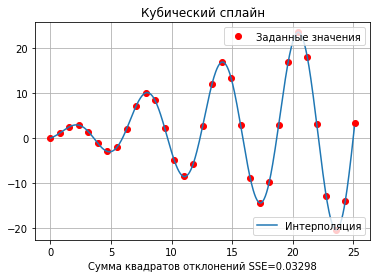

In [4]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

from interp import spline

knots = np.arange(0.0, 8 * pi + 0.1, pi / 4)
values = knots * np.sin(knots) + np.log(knots + 1)
d = np.divide(1, (knots + 1)) + np.sin(knots) + knots * np.cos(knots)
x = np.arange(0.0, 8 * pi, 0.05)
f = spline.Spline().fit(knots, values, d[0], d[-1]).valuesx(x)
true_values = x * np.sin(x) + np.log(x + 1)
SSE = np.sum([(f[i] - true_values[i]) ** 2 for i in range(len(x))])

line1, = plt.plot(knots, values, 'ro', label="Заданные значения")
line2, = plt.plot(x, f, label="Интерполяция")
legend1 = plt.legend(handles=[line1], loc=1)
ax = plt.gca().add_artist(legend1)
plt.legend(handles=[line2], loc=4)
    
plt.grid(True)
plt.title("Кубический сплайн")
plt.xlabel("Сумма квадратов отклонений SSE=%.5f" % SSE)
plt.show()


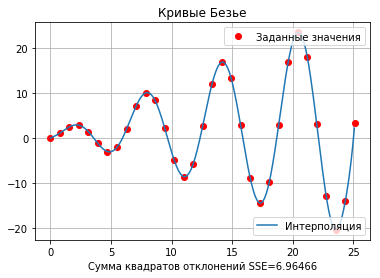

In [2]:
from interp import bezier

Bzr = bezier.Bezier().fit(knots, values, d[0], d[-1]) 
f = [Bzr.value(e) for e in x]
SSE = np.sum([(f[i] - true_values[i]) ** 2 for i in range(len(x))])

line1, = plt.plot(knots, values, 'ro', label="Заданные значения")
line2, = plt.plot(x, f, label="Интерполяция")
legend1 = plt.legend(handles=[line1], loc=1)
ax = plt.gca().add_artist(legend1)
plt.legend(handles=[line2], loc=4)
    
plt.grid(True)
plt.title("Кривые Безье")
plt.xlabel("Сумма квадратов отклонений SSE=%.5f" % SSE)
plt.show()

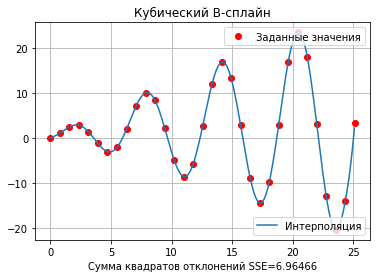

In [3]:
from interp import bspline

BSp = bspline.CubicBSpline().fit(knots, values, d[0], d[-1])
f = [BSp.value(e) for e in x]
SSE = np.sum([(f[i] - true_values[i]) ** 2 for i in range(len(x))])

line1, = plt.plot(knots, values, 'ro', label="Заданные значения")
line2, = plt.plot(x, f, label="Интерполяция")
legend1 = plt.legend(handles=[line1], loc=1)
ax = plt.gca().add_artist(legend1)
plt.legend(handles=[line2], loc=4)
plt.title("Кубический B-сплайн")
plt.xlabel("Сумма квадратов отклонений SSE=%.5f" % SSE)
plt.grid(True)
plt.show()